Problem statement:
-This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.

Step 0: Libraries import

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Step 1: Import dataset

In [14]:
stock = pd.read_csv('S&P500_Stock_Data.csv')
stock

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [15]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [16]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


Step 2: Visualize Dataset

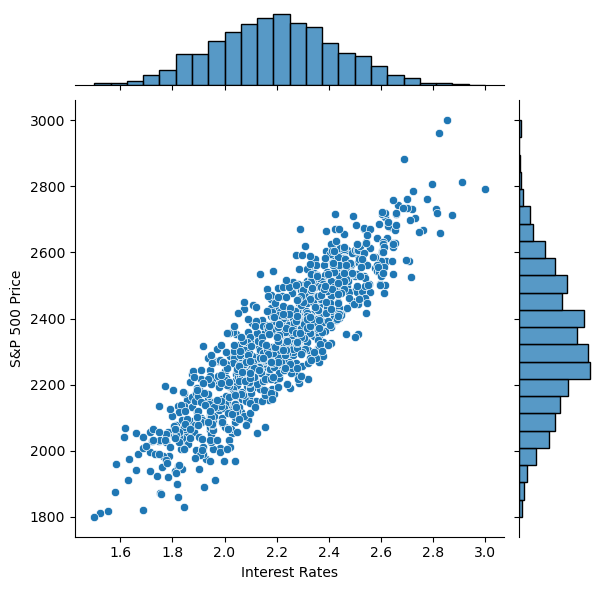

In [17]:
sns.jointplot(x = 'Interest Rates', y = 'S&P 500 Price', data = stock)

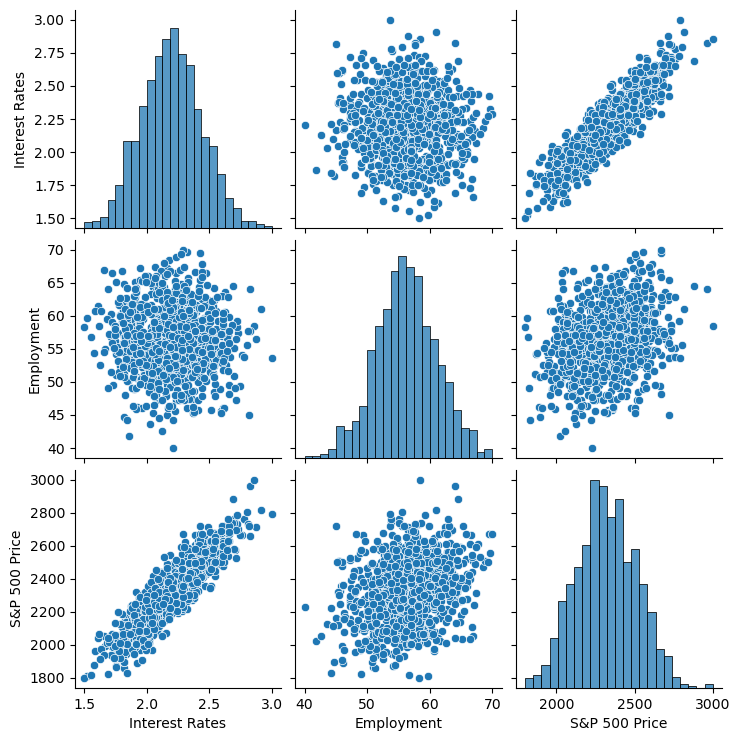

In [18]:
sns.pairplot(stock);

Step 3: Create testing and training dataset/data cleaning

In [19]:
y = stock ['S&P 500 Price']
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [21]:
x = stock[['Interest Rates', 'Employment']]
x

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
x_train

,Interest Rates,Employment
858,2.811910,57.704588
538,2.133354,57.395360
812,2.316698,60.868361
854,2.330540,60.825434
715,2.510581,57.093044
...,...,...
306,2.471602,50.157572
74,2.098943,64.000344
696,2.329522,59.757633
476,2.350533,60.330564


In [24]:
x_test

,Interest Rates,Employment
599,1.798800,66.787443
763,1.987410,52.558830
594,2.064196,54.817290
219,1.809790,54.547848
548,2.264140,50.083527
...,...,...
902,2.223556,61.209005
20,2.348536,58.659428
662,2.096594,55.799034
808,1.960792,59.868800


Step 4: Training the model

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = True)

In [27]:
regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [738.89112349  12.75850711]
Linear Model Coefficient (b) -17.823809244889617


Step 5: Evaluate The Model


In [29]:
y_predict = regressor.predict(x_test)
y_predict

array([2163.4013007 , 2121.2283678 , 2206.77943119, 2015.36301165,
       2294.12041861, 2393.33820275, 2215.77713676, 2171.27418034,
       2407.07130596, 2445.740614  , 2050.88260458, 2578.89780953,
       2405.45012044, 2073.85612093, 2625.64860628, 2358.78361967,
       2581.27768136, 2659.88695206, 2440.98850665, 2373.81188042,
       2659.72573494, 2587.79244272, 2511.27198726, 2300.07004807,
       2501.01123707, 2075.33206679, 2405.70081698, 2116.99463144,
       2188.86029629, 2365.38298475, 2523.06853306, 2203.20368436,
       2453.25442933, 2657.4732371 , 2543.83400571, 2584.49215861,
       2439.28009299, 2134.94387254, 2526.52163253, 2527.26439866,
       2332.7404698 , 2184.53885687, 2548.79047689, 2374.53652734,
       2295.90019651, 2714.14749009, 2243.33453204, 2237.77594876,
       2216.48051971, 2163.33616882, 2465.84129321, 2243.77551156,
       2280.5312358 , 2320.85735401, 2426.3893917 , 2363.41395248,
       2406.81173686, 2092.86128072, 1906.25655138, 2199.74297

In [30]:
y_test

599    2106.275674
763    2204.761129
594    2266.331580
219    1939.222258
548    2299.710400
          ...     
902    2413.405436
20     2495.243030
662    2144.832620
808    2133.682183
938    2393.699500
Name: S&P 500 Price, Length: 200, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

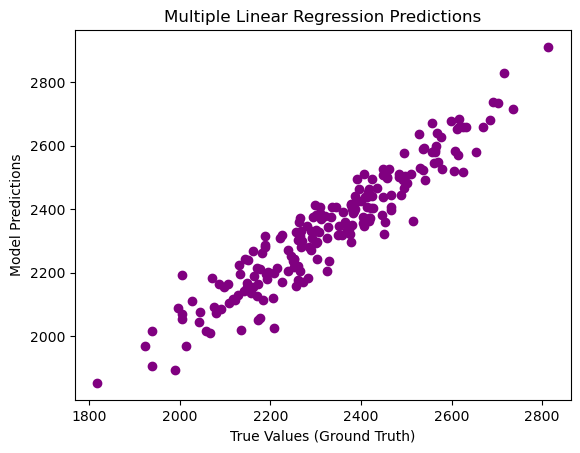

In [31]:
plt.scatter(y_test, y_predict, color = 'purple')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [33]:
k = x_test.shape[1]
n = len(x_test)
n

200

In [34]:
k

2

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
 
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f')) # Root Mean Squared Error
MSE = mean_squared_error(y_test, y_predict) # Mean Squared Error
MAE = mean_absolute_error(y_test, y_predict) # Mean Absolute Error
r2 = r2_score(y_test, y_predict) # r squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1) # adjusted
MAPE = np.mean(np.abs((y_test - y_predict) / y_test)) * 100 # Mean Absolute Percentage Error

In [46]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE', MAE, '\nR2 = ', r2, '\nAdjusted R2 = ', adj_r2, '\nMAPE = ', MAPE)

RMSE =  61.883 
MSE =  3829.510359548575 
MAE 49.6807923792088 
R2 =  0.8866421432507617 
Adjusted R2 =  0.8854913020654903 
MAPE =  2.1541585517251596


Step 6: Visualize the results

In [47]:
from mpl_toolkits.mplot3d import Axes3D

In [50]:
x_surf, y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100), np.linspace(stock['Employment'].min(), stock['Employment'].max(), 100))

In [53]:
x_surf.shape

(100, 100)

In [55]:
only_x = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})

In [57]:
only_x.shape

(10000, 2)

In [59]:
fitted_y = regressor.predict(only_x)
fitted_y.shape

(10000,)

In [60]:
fitted_y = fitted_y.reshape(x_surf.shape)

In [62]:
fitted_y.shape

(100, 100)

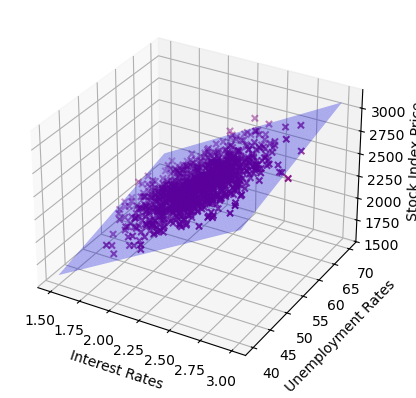

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(stock['Interest Rates'], stock['Employment'], stock['S&P 500 Price'], c = 'purple', marker = 'x')
ax.plot_surface(x_surf, y_surf, fitted_y, color = 'blue', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')
plt.show()

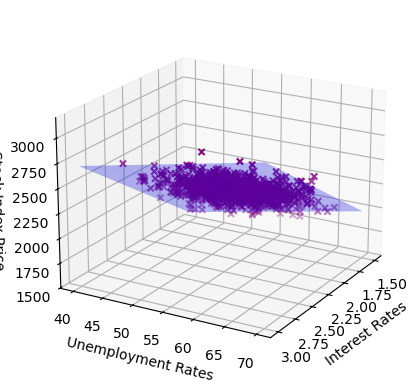

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(stock['Interest Rates'], stock['Employment'], stock['S&P 500 Price'], c = 'purple', marker = 'x')
ax.plot_surface(x_surf, y_surf, fitted_y, color = 'blue', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')
ax.view_init(20, 30) # view angle
plt.show()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns = ['Coefficient'])
coeff_df
# Any unit change in the Interest Rate will have 738. Points impact on S&P 500
# 12. for emplyoment

,Coefficient
Interest Rates,738.891123
Employment,12.758507
